In [1]:
import cv2
import urllib.request

url, filename = ("https://images.unsplash.com/photo-1484353371297-d8cfd2895020?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTUwfHxwZW9wbGV8ZW58MHx8MHx8fDA%3D", "scene.jpg")
urllib.request.urlretrieve(url, filename)    # Download the image

# Load the input image using OpenCV
image = cv2.imread(filename)


In [5]:
from ultralytics import YOLO
import numpy as np

# Load the model
model = YOLO("yolo11n-seg.pt")  # load an official YOLO model

# Predict with the model
results = model(filename)  # predict on an image


# Create an empty mask for segmentation
segmentation_mask = np.zeros_like(image, dtype=np.uint8)




image 1/1 /Users/mac/data/workspace/ultralytics/pythonProject1/scene.jpg: 448x640 14 persons, 1 car, 4 handbags, 164.1ms
Speed: 3.4ms preprocess, 164.1ms inference, 18.0ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
# Iterate over the results
for i, r in enumerate(results):
    # Iterate through the detected masks
    for j, mask in enumerate(r.masks.xy):
        # Convert the class tensor to an integer
        class_id = int(r.boxes.cls[j].item())  # Extract the class ID as an integer
        
        # Check if the detected class corresponds to 'person' (class ID 0)
        if class_id == 0:
            # Convert mask coordinates to an integer format for drawing
            mask = np.array(mask, dtype=np.int32)
            
            # Fill the segmentation mask with color
            cv2.fillPoly(segmentation_mask, [mask], (0, 255, 0))

# Combine the original image with the segmentation mask
segmentation_result = cv2.addWeighted(image, 1, segmentation_mask, 0.7, 0)

# Save the output image with segmentation
cv2.imwrite("output_segmentation.jpg", segmentation_result)


KeyboardInterrupt: 

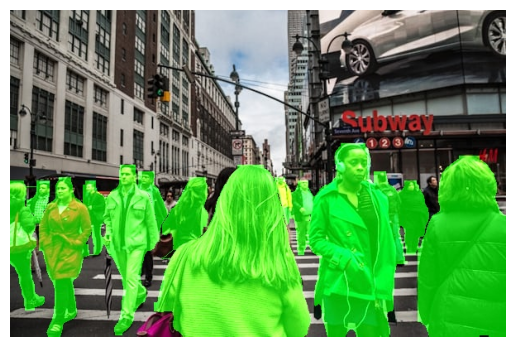

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("output_segmentation.jpg")
plt.imshow(img)
plt.axis('off')
plt.show() 